In [1]:
cd C:\Users\User\AppData\Local\Programs\Python\Python36

C:\Users\User\AppData\Local\Programs\Python\Python36


In [2]:
import hw2

In [3]:
credit_df = hw2.form_dataset("credit-data.csv")

In [4]:
#Load the dataframe into pandas using the given .csv string

In [5]:
data_dictionary = hw2.exploration(credit_df)

In [6]:
#Using the dataframe, obtain a summary of information and a list of column names

In [7]:
print(data_dictionary["Summary Information"])

            PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count   41016.000000      41016.000000                           41016.00000   
mean   115800.154598          0.161400                               6.37587   
std     28112.723511          0.367904                             221.61895   
min        22.000000          0.000000                               0.00000   
25%    106539.750000          0.000000                               0.03431   
50%    119901.500000          0.000000                               0.18973   
75%    134698.250000          0.000000                               0.66716   
max    149999.000000          1.000000                           22000.00000   

                age       zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  41016.000000  41016.000000                          41016.000000   
mean      51.683489  60623.824166                              0.589233   
std       14.746880     11.984357                     

In [8]:
print(data_dictionary["Column Names"])

['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [9]:
chart_list = ['NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents', 'age', 'MonthlyIncome']

In [10]:
#Select a few variables to create charts of

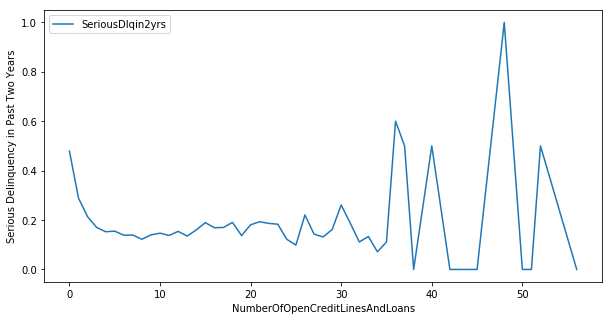

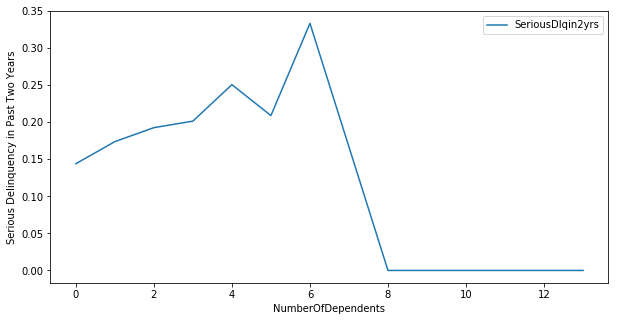

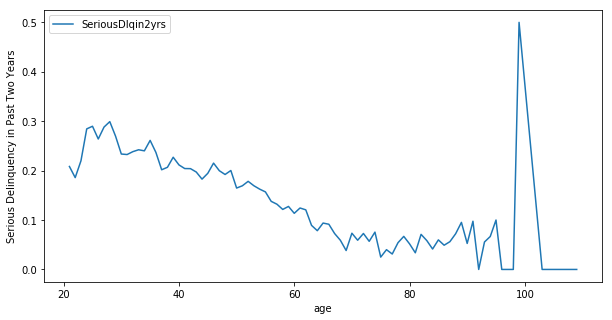

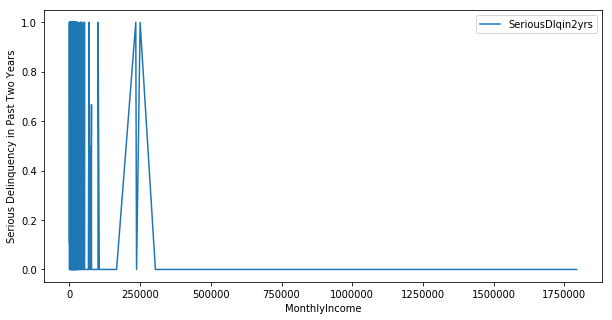

In [11]:
for chart in chart_list:
    graph = hw2.create_graph(credit_df, chart)

In [12]:
drop_list = ['DebtRatio']


In [13]:
credit_df = hw2.processing_drop(credit_df, drop_list, 1)


In [14]:
#Clean dataframe by dropping all anomalous values for DebtRatio where the value is greater than 1

In [15]:
print(credit_df[credit_df['DebtRatio'] > 1])

Empty DataFrame
Columns: [PersonID, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, zipcode, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents]
Index: []


In [16]:
#As seen above, no entries are greater than 1

In [17]:
list_to_mean = ['MonthlyIncome', 'NumberOfDependents']

In [18]:
credit_df = hw2.processing_mean(credit_df, list_to_mean)

In [19]:
#For MonthlyIncome and NumberofDependents, replace null values with the mean of the column

In [20]:
print(credit_df.isna().any())

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool


In [21]:
#No more columns with nulls

In [22]:
multiply_list = ['DebtRatio', 'RevolvingUtilizationOfUnsecuredLines']

In [23]:
credit_df = hw2.processing_mult(credit_df, multiply_list, 100)

In [24]:
#Multiply all values in the above columns by 100 for clarity

In [25]:
categorical_list = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']

In [26]:
#Select columns for use as categorical variables

In [27]:
for variable in categorical_list:
    credit_df = hw2.bin_gen(credit_df, variable)
    bin_label = "Binned_" + variable

In [28]:
#Generate bins for these variables and add them to the dataframe, this discretizes the continous variables

In [29]:
print(list(credit_df))

['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'Binned_RevolvingUtilizationOfUnsecuredLines', 'Binned_DebtRatio', 'Binned_MonthlyIncome', 'Binned_age']


In [30]:
classify_list = ['age', 'DebtRatio', 'MonthlyIncome']

In [31]:
#Select variables to run classifier on

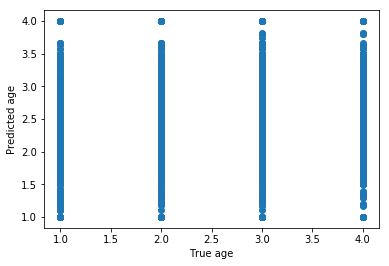

Accuracy Score: 0.2580727180269514
Confusion Matrix: [[2030    0    0    0]
 [1890    0    0    0]
 [2056    0    0    0]
 [1890    0    0    0]]
0.008501143380537535 0.3590364108257752 age


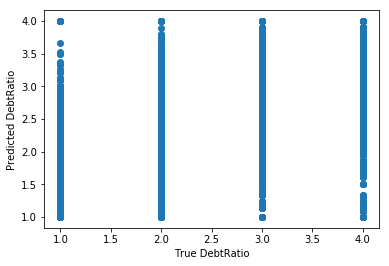

Accuracy Score: 0.24281718789727944
Confusion Matrix: [[1910    0    0    0]
 [1999    0    0    0]
 [1975    0    0    0]
 [1982    0    0    0]]
0.41971201008155434 0.6535950876109514 DebtRatio


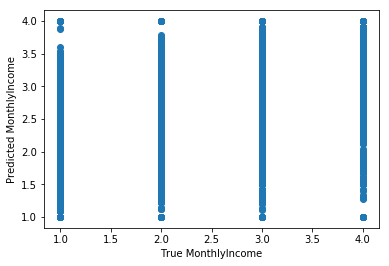

Accuracy Score: 0.24663107042969742
Confusion Matrix: [[1940    0    0    0]
 [1953    0    0    0]
 [2005    0    0    0]
 [1968    0    0    0]]
0.20354177541131369 0.5014770295819612 MonthlyIncome


In [32]:
for classify_variable in classify_list:
    classify_test, classify_train, classify_hat = hw2.classifier(credit_df, classify_variable, 'binned')
    print(classify_test, classify_train, classify_variable)

In [33]:
#For each of the variables, we use a DecisionTreeRegressor to run a classifier - splitting the data into testing and training data

In [34]:
#As we can see from above, it appears that debtratio was most accurate at matching the training data

In [35]:
binned_list = ['Binned_age', 'Binned_MonthlyIncome', 'Binned_RevolvingUtilizationOfUnsecuredLines']

In [36]:
# Since we saw debtratio was most accurate, we take the remaining three variables and their binned_columns

In [37]:
credit_df = hw2.dummy_variable(binned_list, credit_df)

In [38]:
# We take the list of these binned columns and convert them into dummy variables

In [39]:
print(list(credit_df))

['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'Binned_DebtRatio', 'Binned_age_1', 'Binned_age_2', 'Binned_age_3', 'Binned_age_4', 'Binned_MonthlyIncome_1', 'Binned_MonthlyIncome_2', 'Binned_MonthlyIncome_3', 'Binned_MonthlyIncome_4', 'Binned_RevolvingUtilizationOfUnsecuredLines_1', 'Binned_RevolvingUtilizationOfUnsecuredLines_2', 'Binned_RevolvingUtilizationOfUnsecuredLines_3', 'Binned_RevolvingUtilizationOfUnsecuredLines_4']


In [40]:
#As we see from above, debt_ratio is still binned, but the other three variables have been converted into dummy_variables

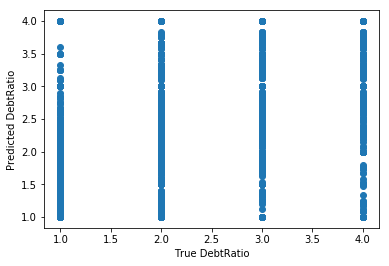

Accuracy Score: 0.24281718789727944
Confusion Matrix: [[1910    0    0    0]
 [1999    0    0    0]
 [1975    0    0    0]
 [1982    0    0    0]]


In [41]:
debt_test, debt_train, debt_hat = hw2.classifier(credit_df, 'DebtRatio', 'dummy')

In [42]:
#Run the decision tree regressor on DebtRatio

In [43]:
print(debt_test, debt_train, 'Debtratio')

0.33417982433482685 0.8377602593232486 Debtratio


In [44]:
#We see a slight improvement in accuracy from the testing set as a result of the inclusion of the dummy_variables